# GWB Image Reconstruct Through Cov Matrix & SVD - Stats Tests

In [1]:
import numpy as np
from numpy.linalg import multi_dot

%matplotlib inline

from matplotlib.pyplot import *
from pylab import subplots, show
import matplotlib.pyplot as plt

import PIL as pl
from PIL import Image

In [2]:
gwb = np.loadtxt("GWB.txt")

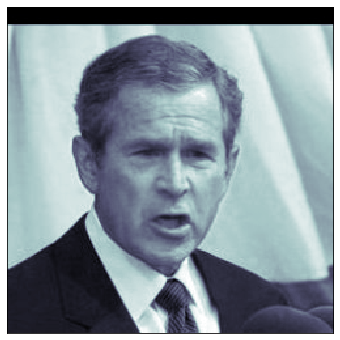

In [3]:
num = 250

# Image choice
choice = 8

A = np.reshape(gwb[:,choice], [250,250])

# figure size
f_size = 6

fig1, axis1 = subplots(1,1, figsize = (f_size, f_size))

cmap = cm.bone

axis1.imshow(A, cmap = cmap)
axis1.get_xaxis().set_visible(False)
axis1.get_yaxis().set_visible(False)
show()

# mse_func function - Run First

In [4]:
# Mean Squared Error Function

def mse_func(A,A_recon):
    sum1 = 0.0
    X = A.shape
    M = X[1]
    N = X[0]

    for j in range(M):
        for i in range(N):
            sum1 = sum1 + (A[i,j] - A_recon[i,j])**2
    MSE =  (sum1/(M*N))
    return MSE

# nk_func function - Run First

In [5]:
# Normalized Cross Correlation Function

def nk_func(A,A_recon):
    m1 = np.size(A[:,0])
    n1 = np.size(A[0,:])

    nk_num = np.zeros(n1)
    nk_denom = np.zeros(n1)

    # Numerator:
    for j in range(n1):
        for i in range(m1):
            nk_num[j] = (A[i,j]*A_recon[i,j]) + nk_num[j]

    sum_nk_num = np.sum(nk_num)

    # Denominator:
    for j in range(n1):
        for i in range(m1):
            nk_denom[j] = (A[i,j])**2 + nk_denom[j]

    sum_nk_denom = np.sum(nk_denom)
    NK = sum_nk_num / sum_nk_denom
    return NK

# nae_func function - Run First

In [6]:
# Normalized Absolute Error Function

def nae_func(A,A_recon):
    m2 = np.size(A[:,0])
    n2 = np.size(A[0,:])

    nae_num = np.zeros(n2)
    nae_denom = np.zeros(n2)

    for j in range(n2):
        for i in range(m2):
            nae_num[j] = np.absolute(A[i,j] - A_recon[i,j]) + nae_num[j]

    sum_nae_num = np.sum(nae_num)

    for j in range(n2):
        for i in range(m2):
            nae_denom[j] = np.absolute(A[i,j]) + nae_denom[j]

    sum_nae_denom = np.sum(nae_denom)
    NAE = sum_nae_num / sum_nae_denom
    return NAE

# sfm_func function - Run First

In [7]:
# Spatial Frequency Measure Function

def sfm_func(A,A_recon):
    sum_R = 0.0
    sum_C = 0.0

    X1 = A.shape
    M1 = X1[1]
    N1 = X1[0]

    # R value
    for j in range(N1):
        for i in range(2,M1):
            sum_R = sum_R + (A[j,i] - A_recon[j,i-1])**2

    R_div = sum_R/(M1*N1)
    R = np.sqrt(R_div)

    # C value
    for i in range(M1):
        for j in range(2,N1):
            sum_C = sum_C + (A[j,i] - A_recon[j-1,i])**2

    C_div = sum_C/(M1*N1)
    C = np.sqrt(C_div)

    SFM = np.sqrt(R**2 + C**2)
    return SFM

# energy_func function - Run First

In [8]:
# Energy Function

def energy_func(A,A_recon):

    X3 = A.shape
    k1 = X3[1]

    U_A_recon, D_A_recon, V_A_recon = np.linalg.svd(A_recon)

    HSN_Num = np.sum(D_A_recon[:k1]**2)

    ENERGY = HSN_Num / HSN_Denom
    return ENERGY

# ssim_func function - Run First

In [9]:
# SSIM - Structural Similarity Index

# SSIM Non-Column Vector Version Function

def ssim_func(A,A_recon):

    # L refers to luminance, 0 to 255
    L = 255
    K_1 = 0.01
    K_2 = 0.03

    C_1 = (K_1*L)**2
    C_2 = (K_2*L)**2
    C_3 = (C_2)/2

    # Mean of Matrix A
    Mu_A = np.mean(A)

    # Mean of Matrix A_recon
    Mu_A_recon = np.mean(A_recon)

    # Variance of Matrix A
    Var_A = np.var(A)

    # Variance of Matrix A_recon
    Var_A_recon = np.var(A_recon)

    # Standard Deviation of Matrix A
    SD_A = np.sqrt(Var_A)

    # Standard Deviation of Matrix A_recon
    SD_A_recon = np.sqrt(Var_A_recon)

    # Covariance of Matrices A and A_recon
    Cov_AA_recon = np.cov(A,A_recon)

    # SSIM

    SSIM_A = (2*Mu_A*Mu_A_recon + C_1)/((Mu_A)**2 + (Mu_A_recon)**2 + C_1)

    SSIM_B = (2*SD_A*SD_A_recon + C_2)/((SD_A)**2 + (SD_A_recon)**2 + C_2)

    # Cov_AA_recon[0,1] refers to the first row and second column since we
    # don't need the entire matrix

    SSIM_C = (Cov_AA_recon[0,1]+ C_3)/(SD_A*SD_A_recon + C_3)

    SSIM = SSIM_A*SSIM_B*SSIM_C

    return SSIM

# ssim_col_func function - Run First

In [11]:
# SSIM - Structural Similarity Index

# SSIM Column Vector Version Function

def ssim_col_func(A,A_recon):

    m = np.size(A[:,0])
    n = np.size(A[0,:])

    # L refers to luminance, 0 to 255
    L = 255
    K_1 = 0.01
    K_2 = 0.03

    C_1 = (K_1*L)**2
    C_2 = (K_2*L)**2
    C_3 = (C_2)/2
    
    A_Col = np.reshape(A,n*n,1)

    A_recon_Col = np.reshape(A_recon,n*n,1)
    
    # Mean of Matrix A_Col
    Mu_A_Col = np.mean(A_Col)

    # Mean of Matrix A_recon_Col
    Mu_A_recon_Col = np.mean(A_recon_Col)

    # Variance of Matrix A_Col
    Var_A_Col = np.var(A_Col)

    # Variance of Matrix A_recon_Col
    Var_A_recon_Col = np.var(A_recon_Col)

    # Standard Deviation of Matrix A_Col
    SD_A_Col = np.sqrt(Var_A_Col)

    # Standard Deviation of Matrix A_recon_Col
    SD_A_recon_Col = np.sqrt(Var_A_recon_Col)

    # Covariance of Matrices A and A_recon_Col
    Cov_AA_recon_Col = np.cov(A_Col,A_recon_Col)

    # SSIM

    SSIM_A_Col = (2*Mu_A_Col*Mu_A_recon_Col + C_1)/((Mu_A_Col)**2 + (Mu_A_recon_Col)**2 + C_1)

    SSIM_B_Col = (2*SD_A_Col*SD_A_recon_Col + C_2)/((SD_A_Col)**2 + (SD_A_recon_Col)**2 + C_2)

    # Cov_AA_recon[0,1] refers to the first row and second column since we
    # don't need the entire matrix

    SSIM_C_Col = (Cov_AA_recon_Col[0,1]+ C_3)/(SD_A_Col*SD_A_recon_Col + C_3)

    SSIM_Col = SSIM_A_Col*SSIM_B_Col*SSIM_C_Col
    return SSIM_Col

# Run this code - MSE & PSNR:

In [14]:
# Using the MSE (Mean Squared Error) and PSNR (Peak Signal to Noise) functions

# Creating the Covariance Matrix

S = A.shape

N = S[0]

Mn = np.zeros(N)

for j in range(N):
    Mn[j] = np.sum(A[j,:]/N)

Mn1 = np.tile(Mn, (N, 1))

Mn2 = Mn1.T

X = A - Mn2

Z = (1.0/np.sqrt(N-1))*(X.T)

# Covariance Matrix covZ

covZ = np.matmul(Z.T, Z)

# Figure sizes
f_size1 = 12
f_size2 = 4

# Font size
ft_size = 15

# SVD
D_2, V_2 = np.linalg.eigh(covZ)

variances = D_2**2

# Number of principal components
n_eig = 250

# Initialize the arrays
mse_array = np.zeros(n_eig-1)
PSNR_array = np.zeros(n_eig-1)

# low end of for loop range
lo = 1

# for loop range step size
stp = 1

# 2 to the power of "en" - to be used in PSNR
# 2**en = 2**8 = 256
en = 8

for k in range(2,n_eig+1):
    Y_2 = np.matmul(V_2[:, N-k:N].T, X)

    # Reconstructing the Image
    A_2 = np.matmul(V_2[:, N-k:N], Y_2)
    A_recon = A_2 + Mn2
#     imshow(A_recon, cmap = cmap)
#     show()
#     print('\n eigenvalues =',k)

    mse_array[k-2] = mse_func(A,A_recon)

    PSNR_array[k-2] = 10*np.log10((((2**en)-1)**2)/mse_array[k-2])

# print('\t')
# print('mse_array')
# print(mse_array)

# print('\t')
# print('PSNR_array')
# print(PSNR_array)

# Run this code - NK & NAE:

In [12]:
# Using the NK (Normalized Cross Correlation) and NAE (Normalized Absolute Error) functions

# Creating the Covariance Matrix

S = A.shape

N = S[0]

Mn = np.zeros(N)

for j in range(N):
    Mn[j] = np.sum(A[j,:]/N)

Mn1 = np.tile(Mn, (N, 1))

Mn2 = Mn1.T

X = A - Mn2

Z = (1.0/np.sqrt(N-1))*(X.T)

# Covariance Matrix covZ

covZ = np.matmul(Z.T, Z)

# Figure sizes
f_size1 = 12
f_size2 = 4

# Font size
ft_size = 15

# SVD
D_2, V_2 = np.linalg.eigh(covZ)

variances = D_2**2

# Number of principal components
n_eig = 250

# Initialize the arrays
nk_array = np.zeros(n_eig-1)
nae_array = np.zeros(n_eig-1)

# low end of for loop range
lo = 1

# for loop range step size
stp = 1

for k in range(2,n_eig+1):
    Y_2 = np.matmul(V_2[:, N-k:N].T, X)

    # Reconstructing the Image
    A_2 = np.matmul(V_2[:, N-k:N], Y_2)
    A_recon = A_2 + Mn2
#     imshow(A_recon, cmap = cmap)
#     show()
#     print('\n eigenvalues =',k)

    nk_array[k-2] = nk_func(A,A_recon)

    nae_array[k-2] = nae_func(A,A_recon)

# print('\t')
# print('nk_array')
# print(nk_array)

# print('\t')
# print('nae_array')
# print(nae_array)

# Plotting MSE, PSNR, NK, and NAE

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'NAE')

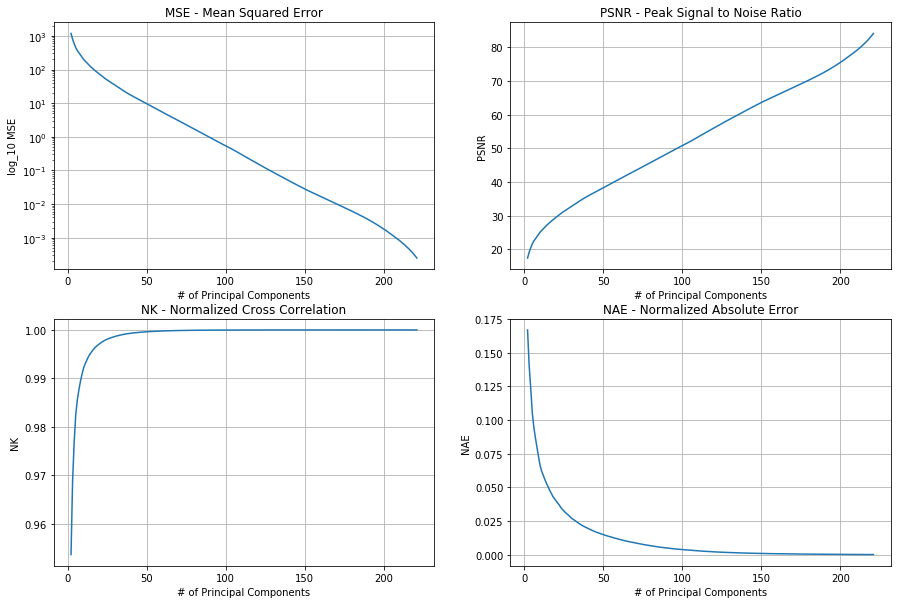

In [14]:
eig_array = np.linspace(2,n_eig,n_eig-1)

length =  15 # figsize length
height = 10 # figsize height
fts = 12

fig, axes = subplots(2,2, figsize = (length,height))

axes[0,0].grid('on')
axes[0,0].semilogy(eig_array[:220],mse_array[:220])
# axes[0,0].plot(eig_array[:220],mse_array[:220])
axes[0,0].set_title('MSE - Mean Squared Error', fontsize = fts)
axes[0,0].set_xlabel('# of Principal Components')
axes[0,0].set_ylabel('log_10 MSE')

axes[0,1].grid('on')
# axes[0,1].semilogy(eig_array[:220],PSNR_array[:220])
axes[0,1].plot(eig_array[:220],PSNR_array[:220])
axes[0,1].set_title('PSNR - Peak Signal to Noise Ratio', fontsize = fts)
axes[0,1].set_xlabel('# of Principal Components')
axes[0,1].set_ylabel('PSNR')

axes[1,0].grid('on')
# axes[1,0].semilogy(eig_array[:220],nk_array[:220])
axes[1,0].plot(eig_array[:220],nk_array[:220])
axes[1,0].set_title('NK - Normalized Cross Correlation', fontsize = fts)
axes[1,0].set_xlabel('# of Principal Components')
axes[1,0].set_ylabel('NK')

axes[1,1].grid('on')
# axes[1,1].semilogy(eig_array[:220],nae_array[:220])
axes[1,1].plot(eig_array[:220],nae_array[:220])
axes[1,1].set_title('NAE - Normalized Absolute Error', fontsize = fts)
axes[1,1].set_xlabel('# of Principal Components')
axes[1,1].set_ylabel('NAE')

# Run this code - SFM & Energy:

In [15]:
# Using the SFM and Energy functions

# Creating the Covariance Matrix

S = A.shape

N = S[0]

Mn = np.zeros(N)

for j in range(N):
    Mn[j] = np.sum(A[j,:]/N)

Mn1 = np.tile(Mn, (N, 1))

Mn2 = Mn1.T

X = A - Mn2

Z = (1.0/np.sqrt(N-1))*(X.T)

# Covariance Matrix covZ

covZ = np.matmul(Z.T, Z)

# Figure sizes
f_size1 = 12
f_size2 = 4

# Font size
ft_size = 15

# SVD
D_2, V_2 = np.linalg.eigh(covZ)

variances = D_2**2

# Number of principal components
n_eig = 250

# Initialize the arrays
sfm_array = np.zeros(n_eig-1)
energy_array = np.zeros(n_eig-1)

# SVD - to obtain D (diagonal i.e. sigma)
U_A, D_A, V_A = np.linalg.svd(A)
HSN_Denom = np.sum(D_A**2)

# low end of for loop range
lo = 1

# for loop range step size
stp = 1

for k in range(2,n_eig+1):
    Y_2 = np.matmul(V_2[:, N-k:N].T, X)

    # Reconstructing the Image
    A_2 = np.matmul(V_2[:, N-k:N], Y_2)
    A_recon = A_2 + Mn2
#     imshow(A_recon, cmap = cmap)
#     show()
#     print('\n eigenvalues =',k)

    sfm_array[k-2] = sfm_func(A,A_recon)
    energy_array[k-2] = energy_func(A,A_recon)

# print('\t')
# print('sfm_array')
# print(sfm_array)

# print('\t')
# print('energy_array')
# print(energy_array)

# Run this code - SSIM - Non-Column Vector Version:

In [16]:
### Might Not Need to Run this Code ###

# Using the Non-Column Vector version of the SSIM function

# Creating the Covariance Matrix

S = A.shape

N = S[0]

Mn = np.zeros(N)

for j in range(N):
    Mn[j] = np.sum(A[j,:]/N)

Mn1 = np.tile(Mn, (N, 1))

Mn2 = Mn1.T

X = A - Mn2

Z = (1.0/np.sqrt(N-1))*(X.T)

# Covariance Matrix covZ

covZ = np.matmul(Z.T, Z)

# Figure sizes
f_size1 = 12
f_size2 = 4

# Font size
ft_size = 15

# SVD
D_2, V_2 = np.linalg.eigh(covZ)

variances = D_2**2

# Number of principal components
n_eig = 250

# Initialize the arrays
ssim_array = np.zeros(n_eig-1)

# SVD - to obtain D (diagonal i.e. sigma)
U_A, D_A, V_A = np.linalg.svd(A)
HSN_Denom = np.sum(D_A**2)

# low end of for loop range
lo = 1

# for loop range step size
stp = 1

for k in range(2,n_eig+1):
    Y_2 = np.matmul(V_2[:, N-k:N].T, X)

    # Reconstructing the Image
    A_2 = np.matmul(V_2[:, N-k:N], Y_2)
    A_recon = A_2 + Mn2
#     imshow(A_recon, cmap = cmap)
#     show()
#     print('\n eigenvalues =',k)

    ssim_array[k-2] = ssim_func(A,A_recon)

# print('\t')
# print('ssim_array')
# print(ssim_array)

# Run this code - SSIM_Col - Column-Vector Version:

In [17]:
# Using the Column Vector version of the SSIM function

# Creating the Covariance Matrix

S = A.shape

N = S[0]

Mn = np.zeros(N)

for j in range(N):
    Mn[j] = np.sum(A[j,:]/N)

Mn1 = np.tile(Mn, (N, 1))

Mn2 = Mn1.T

X = A - Mn2

Z = (1.0/np.sqrt(N-1))*(X.T)

# Covariance Matrix covZ

covZ = np.matmul(Z.T, Z)

# Figure sizes
f_size1 = 12
f_size2 = 4

# Font size
ft_size = 15

# SVD
D_2, V_2 = np.linalg.eigh(covZ)

variances = D_2**2

# Number of principal components
n_eig = 250

# Initialize the array
ssim_col_array = np.zeros(n_eig-1)

# SVD - to obtain D (diagonal i.e. sigma)
U_A, D_A, V_A = np.linalg.svd(A)
HSN_Denom = np.sum(D_A**2)

# low end of for loop range
lo = 1

# for loop range step size
stp = 1

for k in range(2,n_eig+1):
    Y_2 = np.matmul(V_2[:, N-k:N].T, X)

    # Reconstructing the Image
    A_2 = np.matmul(V_2[:, N-k:N], Y_2)
    A_recon = A_2 + Mn2
#     imshow(A_recon, cmap = cmap)
#     show()
#     print('\n eigenvalues =',k)

    ssim_col_array[k-2] = ssim_col_func(A,A_recon)

# print('\t')
# print('ssim_col_array')
# print(ssim_col_array)

# Plotting SFM & SSIM & Energy

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.5, 0, '# of Principal Components')

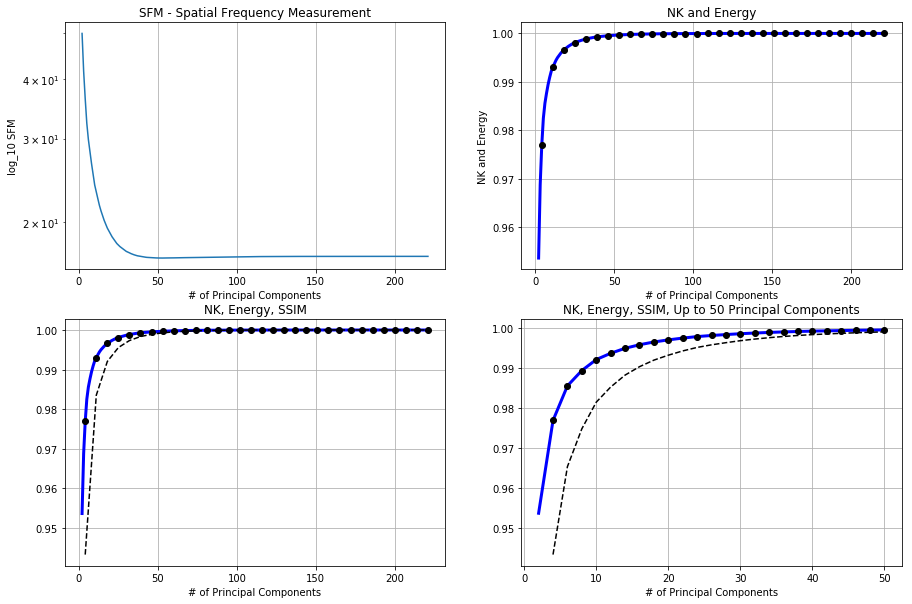

In [21]:
eig_array = np.linspace(2,n_eig,n_eig-1)

length =  15 # figsize length
height = 10 # figsize height
fts = 12

fig, axes = subplots(2,2, figsize = (length,height))

axes[0,0].grid('on')
axes[0,0].semilogy(eig_array[:220],sfm_array[:220])
axes[0,0].set_title('SFM - Spatial Frequency Measurement', fontsize = fts)
axes[0,0].set_xlabel('# of Principal Components')
axes[0,0].set_ylabel('log_10 SFM')

axes[0,1].grid('on')
axes[0,1].plot(eig_array[:220],nk_array[:220], 'b', linewidth = 3)
axes[0,1].plot(eig_array[2:220:7],energy_array[2:220:7],'ko')
axes[0,1].set_title('NK and Energy', fontsize = fts)
axes[0,1].set_xlabel('# of Principal Components')
axes[0,1].set_ylabel('NK and Energy')

axes[1,0].grid('on')
axes[1,0].plot(eig_array[:220],nk_array[:220], 'b', linewidth = 3)
axes[1,0].plot(eig_array[2:220:7],energy_array[2:220:7],'ko')
axes[1,0].plot(eig_array[2:220:7],ssim_col_array[2:220:7],'k--')
axes[1,0].set_title('NK, Energy, SSIM', fontsize = fts)
axes[1,0].set_xlabel('# of Principal Components')
# axes[1,0].set_ylabel('SSIM - Column Vector')

axes[1,1].grid('on')
axes[1,1].plot(eig_array[:50:2],nk_array[:50:2], 'b', linewidth = 3)
axes[1,1].plot(eig_array[2:50:2],energy_array[2:50:2],'ko')
axes[1,1].plot(eig_array[2:50:2],ssim_col_array[2:50:2],'k--')
axes[1,1].set_title('NK, Energy, SSIM, Up to 50 Principal Components', fontsize = fts)
axes[1,1].set_xlabel('# of Principal Components')
# axes[1,0].set_ylabel('SSIM - Column Vector')

#### Don't Run These: For Reference Only

# axes[1,0].grid('on')
# axes[1,0].plot(eig_array[:220],nk_array[:220], 'b', linewidth = 3)
# axes[1,0].plot(eig_array[2:220:7],energy_array[2:220:7],'ko')
# axes[1,0].plot(eig_array[2:220:7],ssim_array[2:220:7],'k--')
# axes[1,0].set_title('NK, Energy, SSIM (NonCol Vector)', fontsize = fts)
# axes[1,0].set_xlabel('# of Principal Components')
# # axes[1,0].set_ylabel('SSIM - Non-Column Vector')

# axes[1,1].grid('on')
# axes[1,1].plot(eig_array[:50:2],nk_array[:50:2], 'b', linewidth = 3)
# axes[1,1].plot(eig_array[2:50:2],energy_array[2:50:2],'ko')
# axes[1,1].plot(eig_array[2:50:2],ssim_array[2:50:2],'k--')
# axes[1,1].set_title('NK, Energy, SSIM (Non-Col Vector), to 50 Prin Cpts', fontsize = fts)
# axes[1,1].set_xlabel('# of Principal Components')
# # axes[1,0].set_ylabel('SSIM - Non-Column Vector')